## Exploration on HGT File

### 1.Terminologies

- SRTM (Shutle Radar Topography Mission)
- DEM (Digital Elevation Model)
- [Useful Link](https://librenepal.com/article/reading-srtm-data-with-python/)

### 2. Calculate Elevation given GPS coordinates and HGT files

In [ ]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
%matplotlib

In [2]:
SAMPLES = 1201 # Change this to 3601 for SRTM1
HGTDIR = r'D:\SRTM3\North_America'
# HGTDIR = r'D:\SRTM3\Africa'

In [3]:
def get_file_name(lon, lat):
    """
    Returns filename such as N27E086.hgt, concatenated
    with HGTDIR where these 'hgt' files are kept
    """

    if lat >= 0:
        ns = 'N'
    elif lat < 0:
        ns = 'S'

    if lon >= 0:
        ew = 'E'
    elif lon < 0:
        ew = 'W'

    hgt_file = "%(ns)s%(lat)02d%(ew)s%(lon)03d.hgt" % {'lat': abs(np.floor(lat)), 'lon': abs(np.floor(lon)), 'ns': ns, 'ew': ew}
#     print(hgt_file)
    hgt_file_path = os.path.join(HGTDIR, hgt_file)
    if os.path.isfile(hgt_file_path):
        return hgt_file_path
    else:
        return None

In [4]:
def read_elevation_from_file(hgt_file, lon, lat):
    with open(hgt_file, 'rb') as hgt_data:
        # Each data is 16bit signed integer(i2) - big endian(>)
        elevations = np.fromfile(hgt_data, np.dtype('>i2'), SAMPLES*SAMPLES)\
                                .reshape((SAMPLES, SAMPLES))

        lat_row = int(round((lat - int(np.floor(lat))) * (SAMPLES - 1), 0))
        lon_row = int(round((lon - int(np.floor(lon))) * (SAMPLES - 1), 0))
        print(lat_row, lon_row)

        return elevations[SAMPLES - 1 - lat_row, lon_row].astype(int)

In [5]:
def get_elevation(lon, lat):
    hgt_file = get_file_name(lon, lat)
    if hgt_file:
        return read_elevation_from_file(hgt_file, lon, lat)
    # Treat it as data void as in SRTM documentation
    # if file is absent
    return -32768

In [6]:
get_elevation(lon=77.56347656250001, lat=30.306503259848835)

-32768

### 3. Visualization on each HGT file

In [7]:
def elevation_visulization(lon, lat, save_fig=False, current_dir=r'', color_step=5):
    hgt_file = get_file_name(lon=lon, lat=lat)
    with open(hgt_file, 'rb') as hgt_data:
        # Each data is 16bit signed integer(i2) - big endian(>)
        dem_array = np.fromfile(hgt_data, np.dtype('>i2'), SAMPLES*SAMPLES)\
                                .reshape((SAMPLES, SAMPLES))
    lat_row = int(round((lat - int(np.floor(lat))) * (SAMPLES - 1), 0))
    lon_row = int(round((lon - int(np.floor(lon))) * (SAMPLES - 1), 0))
    print(lat_row, lon_row)
    
    #Plot our data with Matplotlib's 'contourf'
    fig = plt.figure(figsize = (12, 12))
    ax = fig.add_subplot(111)
    img = ax.contourf(dem_array[::-1], cmap = "jet", 
                levels = list(range(np.sort(list(set(dem_array.flatten())))[1], np.max(dem_array), color_step)))
    ax.add_patch(Circle((abs(lon_row), abs(lat_row)), radius=10, color='red'))
    fig.colorbar(img)
    plt.gca().set_aspect('equal', adjustable='box')
    if save_fig:
        plt.savefig(os.path.join(current_dir, 'Longitude={}, Latitude={}.jpg'.format(lon, lat)))
    return dem_array

199 355


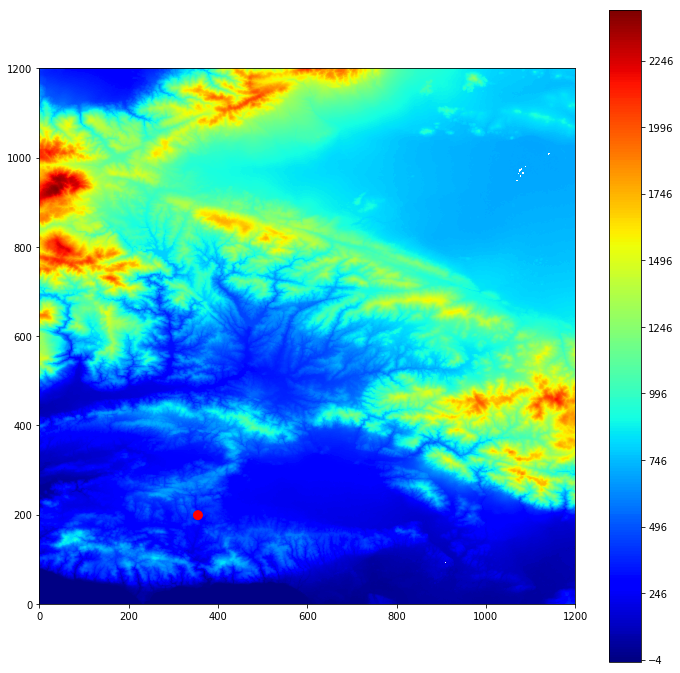

In [8]:
dem_array = elevation_visulization(lon=-118.7043637, lat=34.16617301, 
                       save_fig=False, current_dir=r'visualization samples',
                       color_step=10)